In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats


In [2]:
data=pd.read_csv('C://Users//vivia//OneDrive//Desktop//telephone sales data.csv')

In [3]:
data.shape

(28645, 21)

# 1.Data preprocessing

In [4]:
#check null value
null_column=data.isna().sum()[data.isna().sum()>0].index.tolist()

In [5]:
null_column

[]

In [6]:
#check duplicated value
data.duplicated().sum()

0

In [7]:
#data type
data.dtypes

id                  int64
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
data.describe()

,id,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,28645.000000,28645.000000,28645.000000,28645.000000,28645.000000,28645.000000,28645.000000,28645.000000,28645.000000,28645.000000
mean,20605.360272,39.983522,2.558597,962.634177,0.168546,0.081533,93.575515,-40.482845,3.621971,5167.001431
std,11885.805422,10.420328,2.759939,186.526076,0.486813,1.574052,0.579850,4.639215,1.735531,72.344892
min,1.000000,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10354.000000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20547.000000,38.000000,2.000000,999.000000,0.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000
75%,30921.000000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41187.000000,98.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
#columns with unknown values
unknown_list=[]
for i in data.columns.values.tolist():
    print(i,':number of unknown values:',sum(data[i]=='unknown'))
    if(sum(data[i]=='unknown')>0):
        unknown_list.append(i)

id :number of unknown values: 0
age :number of unknown values: 0
job :number of unknown values: 242
marital :number of unknown values: 56
education :number of unknown values: 1210
default :number of unknown values: 5952
housing :number of unknown values: 704
loan :number of unknown values: 704
contact :number of unknown values: 0
month :number of unknown values: 0
day_of_week :number of unknown values: 0
campaign :number of unknown values: 0
pdays :number of unknown values: 0
previous :number of unknown values: 0
poutcome :number of unknown values: 0
emp.var.rate :number of unknown values: 0
cons.price.idx :number of unknown values: 0
cons.conf.idx :number of unknown values: 0
euribor3m :number of unknown values: 0
nr.employed :number of unknown values: 0
y :number of unknown values: 0


In [10]:
unknown_list

['job', 'marital', 'education', 'default', 'housing', 'loan']

In [12]:
#if we make unknown values into dummies
d1=data

In [13]:
d1=pd.get_dummies(d1,columns=unknown_list)

In [14]:
d1.head()

,id,age,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,...,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,1,52,cellular,nov,tue,1,999,0,nonexistent,-0.1,...,0,1,0,0,0,0,1,1,0,0
1,2,33,cellular,nov,thu,1,999,0,nonexistent,-0.1,...,0,1,0,0,0,0,1,1,0,0
2,5,54,cellular,may,mon,1,999,0,nonexistent,-1.8,...,0,1,0,0,0,0,1,1,0,0
3,6,53,cellular,jun,thu,1,999,2,failure,-2.9,...,0,1,0,0,1,0,0,0,0,1
4,8,42,cellular,aug,tue,2,999,0,nonexistent,1.4,...,0,0,1,0,0,0,1,1,0,0


In [15]:
#use unknown as base group
#drop unknown columns
unknown_list_u=[0,0,0,0,0,0]
for i in range(len(unknown_list)):
    unknown_list_u[i]=unknown_list[i]+'_unknown'

In [16]:
d1=d1.drop(columns=unknown_list_u)

In [17]:
#Remove id
d1=d1.drop('id',axis=1)

In [18]:
#make string columns into dummies
d1=pd.get_dummies(d1,columns=['contact','poutcome','month','day_of_week'],drop_first=True)

In [19]:
#transform y to boolean
d1.loc[:,'y']=(d1.loc[:,'y']=='yes')

In [20]:
d1.columns.values

array(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_no', 'default_yes', 'housing_no', 'housing_yes',
       'loan_no', 'loan_yes', 'contact_telephone', 'poutcome_nonexistent',
       'poutcome_success', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'

### Feature Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0, 1)) 
d1= pd.DataFrame(scaler.fit_transform(d1), columns = d1.columns) 

### Split the dataset into training set and test set

In [22]:
X=d1.loc[:,d1.columns.values!='y']
y=d1.loc[:,'y']

In [23]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2,shuffle=True)

### Feature Oversampling

In [24]:
from imblearn.over_sampling import SMOTE
Smote = SMOTE(random_state=11) 
X_train_over, y_train_over = Smote.fit_resample(train_x, train_y) 

In [25]:
X_train_over.shape

(40516, 52)

# 2.Modeling

### SVM

In [49]:
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score, cross_validate 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [27]:
# linear 
svc = SVC(kernel = 'linear') 
 
# rbf 
svc_rbf = SVC(kernel = 'rbf')

In [29]:
#1. Cross Validation 
# linear 
scores = cross_val_score(svc, X_train_over, y_train_over, cv = 5) 
print(scores) 
print(scores.mean()) 

[0.71581935 0.72763174 0.73960262 0.72639763 0.72923609]
0.7277374844045793


In [30]:
# rbf
scores2 = cross_val_score(svc_rbf, X_train_over, y_train_over, cv = 5) 
print(scores2) 
print(scores2.mean())

[0.76258638 0.88930026 0.88843638 0.89571764 0.89510058]
0.8662282466647637


In [ ]:
 ## -> 'rbf' is better

In [ ]:
#2. Grid Search
param_grid = {'C':[0.1, 1, 10, 50, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 
 
grid = GridSearchCV(SVC(kernel = 'rbf'), param_grid, refit=True, verbose =3, cv = 3) 
 
grid.fit(X_train_over, y_train_over) 
 
print(grid.best_params_) # {'C': 10, 'gamma': 1} 
print(grid.best_estimator_) # SVC(C=10, gamma=1)

In [ ]:
#3. Modeling with best params
svc_rbf = SVC(kernel = 'rbf', C = 10, gamma = 1) 
svc_rbf.fit(X_train_over, y_train_over) 
y_pred_rbf = svc_rbf.predict(test_x) 

In [50]:
#4. Accuracy
print('SVM f1 score:{:.2f}'.format(f1_score(test_y, y_pred_rbf))) 
print('SVM AUC score:{:.2f}'.format(roc_auc_score(test_y, y_pred_rbf)))
print('SVM Accuracy score:{:.2f}'.format(accuracy_score(test_y, y_pred_rbf)))

SVM f1 score:0.20
SVM AUC score:0.55
SVM Accuracy score:0.84


### Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier 

In [ ]:
#1. Grid Search
params = { 

    "loss": ["deviance"], 

    "learning_rate": [0.01, 0.05, 0.1, 0.2], 

    "max_depth": [3, 5, 8], 

    "max_features": ['log2', 'sqrt'], 

    "n_estimators": [10, 50, 100] 

} 

clf = GridSearchCV(GradientBoostingClassifier(), params, cv = 5, n_jobs = 1) 

In [58]:
best_params_gdb={'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}

In [59]:
#2. Modeling with best params
gdb=GradientBoostingClassifier(**best_params_gdb)
gdb.fit(X_train_over, y_train_over)
y_pred_gdb=gdb.predict(test_x)

In [60]:
#3. Accuracy
print('Gradient Boosting f1 score:{:.2f}'.format(f1_score(test_y, y_pred_gdb))) 
print('Gradient Boosting AUC score:{:.2f}'.format(roc_auc_score(test_y, y_pred_gdb)))
print('Gradient Boosting Accuracy score:{:.2f}'.format(accuracy_score(test_y, y_pred_gdb)))

Gradient Boosting f1 score:0.49
Gradient Boosting AUC score:0.74
Gradient Boosting Accuracy score:0.87


### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#1. Grid Search
lr = LogisticRegression(random_state=0, solver='liblinear') 
params = {'C': [0.1, 1, 3, 5, 10], 
          'max_iter': [10, 100, 1000], 
          "penalty": ["l1", "l2"]} 
lr_griv_cv = GridSearchCV(lr, param_grid=params, cv=3, scoring='accuracy', verbose=1)

In [62]:
best_params_lr={'C': 10, 'max_iter': 10, 'penalty': 'l2'} 

In [63]:
#2. Modeling with best params
lr=LogisticRegression(**best_params_lr,random_state=0, solver='liblinear') 
lr.fit(X_train_over, y_train_over)
y_pred_lr=lr.predict(test_x)

In [64]:
#3. Accuracy
print('Logistic Regression f1 score:{:.2f}'.format(f1_score(test_y, y_pred_lr))) 
print('Logistic Regression AUC score:{:.2f}'.format(roc_auc_score(test_y, y_pred_lr)))
print('Logistic Regression Accuracy score:{:.2f}'.format(accuracy_score(test_y, y_pred_lr)))

Logistic Regression f1 score:0.41
Logistic Regression AUC score:0.74
Logistic Regression Accuracy score:0.79


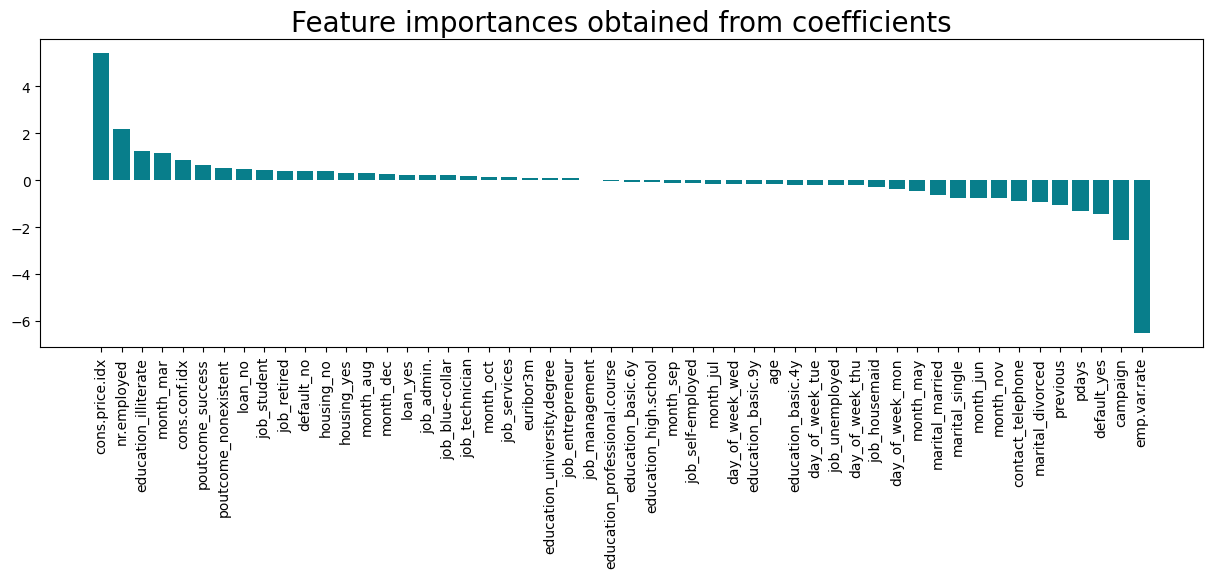

In [133]:
#4. Feature Importance
importances = pd.DataFrame(data={
    'Attribute': X_train_over.columns,
    'Importance': lr.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(15,4))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#1. Grid Search
rnd_clf = RandomForestClassifier() 
param_grid = {'n_estimators': [100, 200, 350, 500], 
              'criterion' :['gini', 'entropy'],
             'bootstrap':[False,True],
            'min_samples_leaf':np.arange(1,10,2),
            'min_samples_split':np.arange(1,10,2),
            'max_features':['auto','sqrt','log2'],
            'max_depth' : np.arange(9,12,1)
             }
gscv_rnd = GridSearchCV(rnd_clf, param_grid, scoring = 'accuracy',cv = 5) 

In [76]:
best_params_rnd= {
    'bootstrap':False,
    'min_samples_leaf':1,
    'min_samples_split':5,
    'max_features':'auto',
    'n_estimators':500,
   'max_depth':11,
    'criterion':'gini'} 


In [77]:
#2. Modeling with best params
rnd=RandomForestClassifier(**best_params_rnd)
rnd.fit(X_train_over, y_train_over)
y_pred_rnd=rnd.predict(test_x)

In [78]:
#3. Accuracy
print('Random Forest f1 score:{:.2f}'.format(f1_score(test_y, y_pred_rnd))) 
print('Random Forest AUC score:{:.2f}'.format(roc_auc_score(test_y, y_pred_rnd)))
print('Random Forest Accuracy score:{:.2f}'.format(accuracy_score(test_y, y_pred_rnd)))

Random Forest f1 score:0.50
Random Forest AUC score:0.74
Random Forest Accuracy score:0.88


### Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [83]:
#1. GaussianNB
#GaussianNB does not allow hyperparameter-tuning
def gaussian(X_train_over, y_train_over,test_x):
    gnb = GaussianNB()
    gnb.fit(X_train_over, y_train_over)
    y_pred=gnb.predict(test_x)
    print('GaussianNB f1 score:{:.2f}'.format(f1_score(test_y, y_pred))) 
    print('GaussianNB AUC score:{:.2f}'.format(roc_auc_score(test_y, y_pred)))
    print('GaussianNB Accuracy score:{:.2f}'.format(accuracy_score(test_y, y_pred)))

In [84]:
gaussian(X_train_over, y_train_over,test_x)

GaussianNB f1 score:0.35
GaussianNB AUC score:0.71
GaussianNB Accuracy score:0.72


In [87]:
#2. Bernouli
def bernouli(X_train_over, y_train_over,test_x):
    params = {'alpha': [0.001,0.003,0.01, 0.03,0.1,0.3,1.0,3.0,10.0],
              'fit_prior': [True, False],
              'binarize': [None, 0.0, 8.5, 10.0]
             }

    bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, scoring='f1', cv=5, )
    bernoulli_nb_grid.fit(X_train_over, y_train_over)
    print('Best Parameters : {}'.format(bernoulli_nb_grid.best_params_))
    
    y_pred=bernoulli_nb_grid.predict(test_x)
    print('BernouliNB f1 score:{:.2f}'.format(f1_score(test_y, y_pred))) 
    print('BernouliNB AUC score:{:.2f}'.format(roc_auc_score(test_y, y_pred)))
    print('BernouliNB Accuracy score:{:.2f}'.format(accuracy_score(test_y, y_pred)))

In [88]:
bernouli(X_train_over, y_train_over,test_x)

Best Parameters : {'alpha': 0.001, 'binarize': None, 'fit_prior': True}
BernouliNB f1 score:0.38
BernouliNB AUC score:0.72
BernouliNB Accuracy score:0.75


In [89]:
#Bernouli is better
best_params_nb={'alpha': 0.001, 'binarize': None, 'fit_prior': True}

In [92]:
#3. Bernouli modeling with best params
nb=BernoulliNB(**best_params_nb)
nb.fit(X_train_over, y_train_over)
y_pred_nb=nb.predict(test_x)

In [94]:
print('BernouliNB f1 score:{:.2f}'.format(f1_score(test_y, y_pred_nb))) 
print('BernouliNB AUC score:{:.2f}'.format(roc_auc_score(test_y, y_pred_nb)))
print('BernouliNB Accuracy score:{:.2f}'.format(accuracy_score(test_y, y_pred_nb)))

BernouliNB f1 score:0.38
BernouliNB AUC score:0.72
BernouliNB Accuracy score:0.75


### XGboost

In [96]:
from xgboost import XGBClassifier

In [ ]:
#1. Grid Search
params = {
         'reg_alpha':[0,1e-05,1e-03,0.01,1],
          'learning_rate':[0.01,0.1,0.3],
          'min_child_weight':[6,7,8],
          'max_depth':[9,10,11],
          'gamma':[0,0.1,0.4,1],
          'n_estimators':[100,500,1000]
        
        }                                 
xgb_clf = XGBClassifier(
             subsample=0.75,
             colsample_bytree=0.8,
             objective= 'binary:logistic',
             scale_pos_weight=1,
             n_jobs=-1
)
xgb_gs=GridSearchCV(xgb_clf, param_grid=params, scoring='f1', cv=5 )

In [98]:
best_params_xgb={
 'learning_rate': 0.1,
 'max_depth': 11,
 'min_child_weight': 8,
 'reg_alpha': 0.001,
 'gamma':0.4,
 'n_estimators':100}

In [103]:
#2. Modeling with best params
xgb= XGBClassifier(
             **best_params_xgb,
             subsample=0.75,
             colsample_bytree=0.8,
             objective= 'binary:logistic',
             scale_pos_weight=1,
             n_jobs=-1
)
xgb.fit(X_train_over, y_train_over)
y_pred_xgb=xgb.predict(test_x)

In [104]:
#3. Accuracy
print('XGboost f1 score:{:.2f}'.format(f1_score(test_y, y_pred_xgb))) 
print('XGboost AUC score:{:.2f}'.format(roc_auc_score(test_y, y_pred_xgb)))
print('XGboost Accuracy score:{:.2f}'.format(accuracy_score(test_y, y_pred_xgb)))

XGboost f1 score:0.42
XGboost AUC score:0.65
XGboost Accuracy score:0.90


### Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
#1. Grid Search
dt_clf=DecisionTreeClassifier(min_samples_leaf=1,criterion='gini',max_depth=9)
params = {
        'min_samples_leaf':np.arange(1, 8),
        'min_samples_split':np.arange(2, 8)
        }      
dt_gs=GridSearchCV(dt_clf,param_grid=params, scoring='f1', cv=5 )
dt_gs.fit(X_train_over, y_train_over)
y_pred_dt=dt_gs.predict(test_x)
dt_gs.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 3}

In [126]:
best_params_dt={'min_samples_leaf': 1,'criterion': 'gini','max_depth': 9,'min_samples_leaf': 1, 'min_samples_split': 3}

In [127]:
#2. Modeling with best params
dt=DecisionTreeClassifier(**best_params_dt)
dt.fit(X_train_over, y_train_over)
y_pred_dt=dt.predict(test_x)

In [128]:
#3. Accuracy
print('Decision Tree f1 score:{:.2f}'.format(f1_score(test_y, y_pred_dt))) 
print('Decision Tree AUC score:{:.2f}'.format(roc_auc_score(test_y, y_pred_dt)))
print('Decision Tree Accuracy score:{:.2f}'.format(accuracy_score(test_y, y_pred_dt)))

Decision Tree f1 score:0.43
Decision Tree AUC score:0.68
Decision Tree Accuracy score:0.88


Text(0.5, 0, 'Decision Tree Feature Importance')

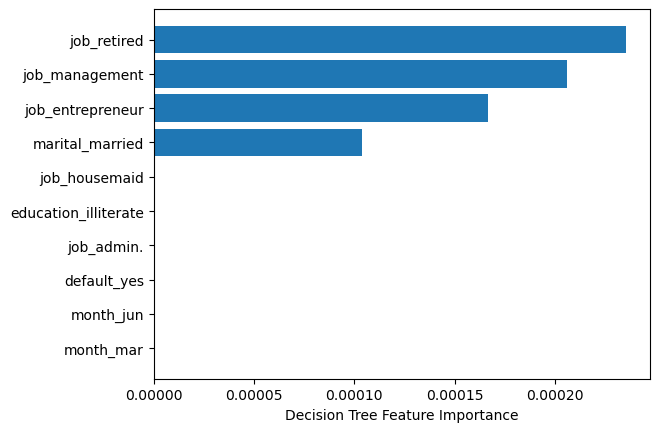

In [143]:
#4. Visualize weight
#select top 10 features
importances = dt.feature_importances_
sorted_idx = importances.argsort()
plt.barh(X_train_over.columns[sorted_idx][0:10], dt.feature_importances_[sorted_idx][0:10])
plt.xlabel("Decision Tree Feature Importance")